# Linear Reggression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DELL\AppData\Local\Temp\ipykernel_3708\2576372276.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


#### Features (X)
CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxides concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property-tax rate per \$10,000  
PTRATIO: Pupil-teacher ratio by town  
B: $1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town  
LSTAT: Percentage of the lower status of the population  

#### Target (y)
MEDV: Median value of owner-occupied homes in $1000's

In [3]:
display(pd.DataFrame(X).head(5))
display(y[:5])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([24. , 21.6, 34.7, 33.4, 36.2])

In [4]:
# train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# initialize the linear reggression model
model = LinearRegression()

In [6]:
# train the model for the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# get the coefficients trained linear reggression model
print(model.coef_)

[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [8]:
# get the prediction for the testing dataset from the trained model.
y_pred = model.predict(X_test)

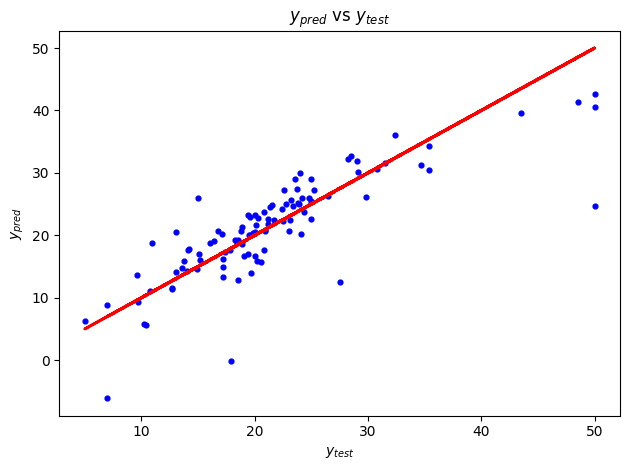

In [9]:
# plot the prediction against the target values of testing data set
plt.figure()
plt.scatter(y_test, y_pred, color="blue", s=12)
plt.plot(y_test, y_test, color="red", linewidth=2)
plt.title("$y_{pred}$ vs $y_{test}$")
plt.xlabel("$y_{test}$")
plt.ylabel("$y_{pred}$")
plt.tight_layout()
plt.show()

In [10]:
# evaluate the accuracy of the predictions
mae = mean_squared_error(y_test, y_pred)
print("MSE =", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared =", r2)

MSE = 24.291119474973335
R-squared = 0.6687594935356345


Now let's study how the accuracy of predictions varies with respect to the size of the training dataset.

In [11]:
test_size_arr = np.arange(0.1, 1, 0.1)
r2_arr = np.array([])

for test_size in test_size_arr:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  r2_arr = np.append(r2_arr, r2_score(y_test, model.predict(X_test)))

print(r2_arr)

[0.75446825 0.66875949 0.71896952 0.72099433 0.70313706 0.7207531
 0.73266516 0.74376533 0.74788747]


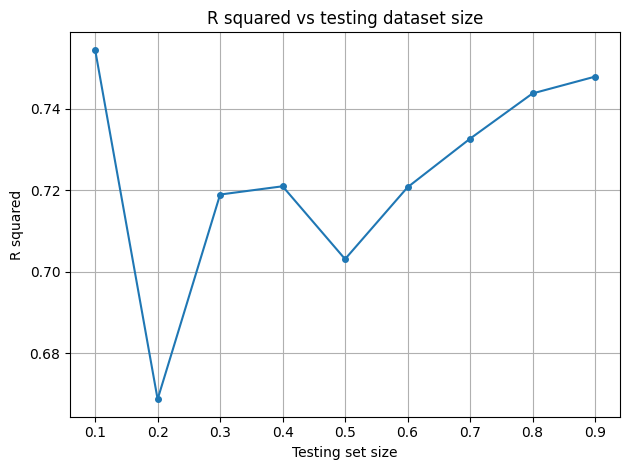

In [12]:
plt.figure()
plt.plot(test_size_arr, r2_arr, marker="o", markersize=4)
plt.title("R squared vs testing dataset size")
plt.xlabel("Testing set size")
plt.ylabel("R squared")
plt.tight_layout()
plt.grid()
plt.show()